In [130]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
import networkx as nx

In [131]:
occupancy_map_img = Image.open('occupancy_map.png')

occupancy_grid = (np.asarray(occupancy_map_img) > 0).astype(int)
occupancy_grid

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [132]:
def validsample(occupancyGrid):
    rows,cols = occupancyGrid.shape
    while True:
        x = int(np.random.uniform(0,rows))
        y = int(np.random.uniform(0,cols))
        if(occupancyGrid[x,y]>0):
            return (x,y)

In [144]:
def reachability_check(occupancyGrid,v1,v2):
    x1 = v1[0]
    x2 = v2[0]
    y1 = v1[1]
    y2 = v2[1]
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    x, y = x1, y1
    sx = -1 if x1 > x2 else 1
    sy = -1 if y1 > y2 else 1
    if dx > dy:
        err = dx / 2.0
        while x != x2:
            if occupancy_grid[x][y] == 0:
                return False
            err -= dy
            if err < 0:
                y += sy
                err += dx
            x += sx
    else:
        err = dy / 2.0
        while y != y2:
            if occupancy_grid[x][y] == 0:
                return False
            err -= dx
            if err < 0:
                x += sx
                err += dy
            y += sy
    return True

In [145]:
from bresenham import bresenham
neighbour_trial = [(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,0),(1,-1),(1,1)]

def reachabilityCheck(occupancyGrid, v1, v2):
    points = bresenham(v1[0],v1[1],v2[0],v2[1])
    for indx in points :
        for x,y in neighbour_trial :
            search_point = (indx[0]+x,indx[1]+y)
            if occupancyGrid[search_point] == 0:
                return False
    return True

In [146]:
def d(pos_1, pos_2):
    """
    Function to caluclate the L2 norm between 2 points.
    """
    pos1 = np.array(pos_1)
    pos2 = np.array(pos_2)
    euclidean_distance = np.linalg.norm(pos1 - pos2)
    return euclidean_distance

In [147]:
def constructPRM(N, d_max,occupancy_grid):
    """
    Function to construct a PRM graph from an occupancy grid
    """

    G = nx.Graph()
    for k in range(N):
        #sample a new vertex
        vertex = validsample(occupancy_grid)
        AddVertex(G, vertex, d_max)
    return G

In [148]:
def AddVertex(G, v_new, d_max):
    """
    Function to add the sampled points to the graph and add edges if 
    they dont hit an obstacle along the way. 
    """
    
    #Add vertex v new to G
    G.add_node(v_new)
    for v in G.nodes:
        #Link v new to nearby vertices
        if v!=v_new and d(np.array(v),np.array(v_new))<d_max:
            
            #if planning succeeds
            if(reachability_check(occupancy_grid,v_new, v)):
                
                #Add edge e = (v, v new ) to G
                weight = d(np.array(v),np.array(v_new))
                G.add_edge(v, tuple(v_new), weight=weight)
                #print("Yup")

In [149]:
grid = occupancy_grid
G = constructPRM(2500, 75,occupancy_grid)

In [150]:
print("edges :", len(G.edges))
print("nodes :", len(G.nodes))

edges : 95957
nodes : 2480


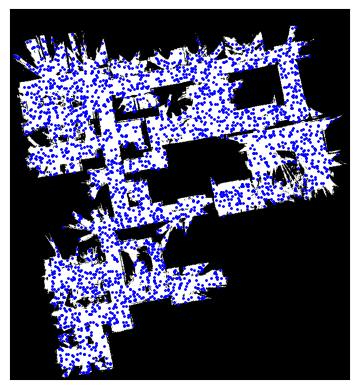

In [151]:
pos = {node: (node[1], node[0]) for node in G.nodes()}
nx.set_node_attributes(G, pos, 'pos')
#nx.draw_networkx_edges(G, pos, edgelist=list(G.edges()), edge_color='red')
nx.draw_networkx_nodes(G, pos, node_size=1, node_color='blue')
plt.imshow(occupancy_grid, cmap = 'gray')
plt.axis("on") 
plt.show()

In [152]:
start = (635, 140)
goal = (350, 400)
G.add_node(start) 
G.add_node(goal)

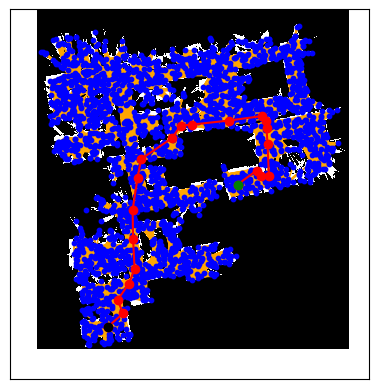

In [153]:
hasconnected = False
while not hasconnected:
    vertex = validsample(occupancy_grid)
    AddVertex(G, vertex, 75)
    if nx.has_path(G,(635, 140), (350, 400)):
        hasconnected = True
path = nx.astar_path(G, start, goal, heuristic=d)

plt.imshow(occupancy_grid, cmap='gray', interpolation='none')

x = [point[1] for point in path]
y = [point[0] for point in path]
pos = {node: (node[1], node[0]) for node in G.nodes()}

nx.set_node_attributes(G, pos, 'pos')
nx.draw_networkx_edges(G, pos, edgelist=list(G.edges()), edge_color='orange')
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='blue')

plt.plot(x, y, 'ro-')
plt.plot(start[1], start[0], 'ko')
plt.plot(goal[1], goal[0], 'go')
plt.show()

In [155]:
distance = np.sum(np.sqrt(np.sum(np.diff(path[1:], axis=0)**2, axis=1)))
distance

790.288436045361